# Unit 1: Probability

The goals of this assignment are to help you (1) calculate probabilities, (2) simulate probabilistic processes, and (3) estimate probabilities through numerical (computer) simulation. Such simulations can be useful. We can use simulations to help confirm that we've calculated a probability "by hand" correctly.

## Problem 1

**1.(a) Construct a vector/array that represents a coin. The vector, called `coin`, should have two entries, one for heads and one for tails.**

In [52]:
coin = c("H","T")
coin

[1] "H" "T"

**1.(b) Simulate flipping the coin $500$ times (the function `sample()` may be useful here)**

In [53]:
set.seed(123)
flips = sample(coin, size=500, prob = c(0.5,0.5), replace=TRUE)
head(flips)
tail(flips)

[1] "T" "H" "T" "H" "H" "T"

[1] "T" "H" "T" "T" "H" "H"

**1.(c) Plot the proportion of times the "coin" landed on heads up to the $i^{th}$ flip, for $i = 1,...,500$. The $x$-axis should represent the number of flips, starting at $1$ and going to $500$, and the y-axis should represent the cumulative proportion of heads at flip $i$. Why does this number fluctuate more when the number of flips is smaller?**

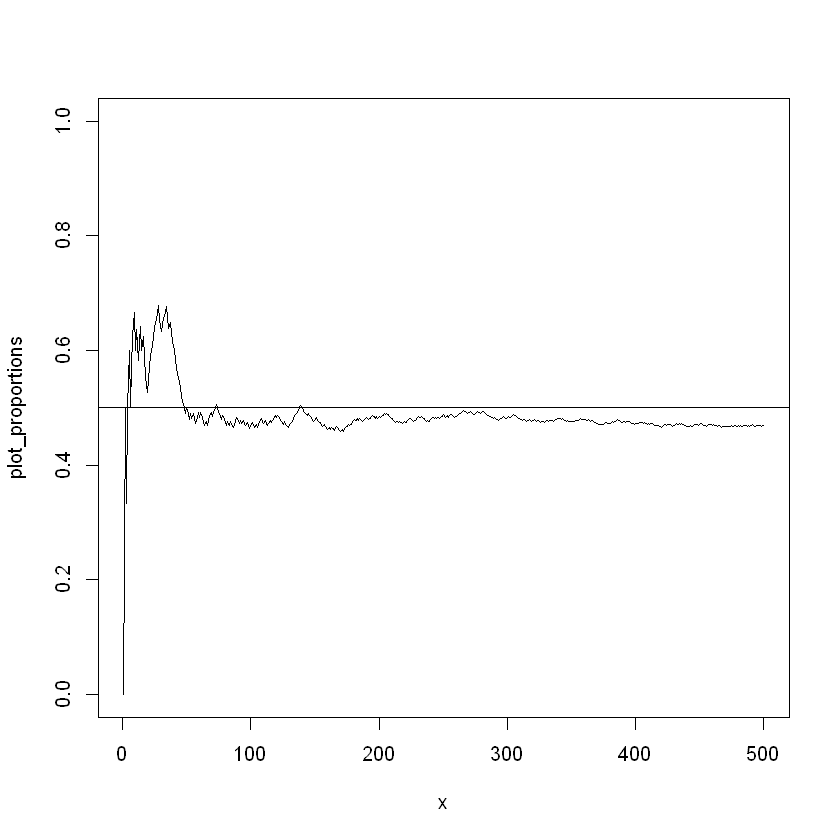

In [54]:
cumulative_heads = 0
plot_proportions = c()

for (i in 1:length(flips)){
    heads = flips[i] == "H"
    cumulative_heads = cumulative_heads + heads
    proportion_heads = cumulative_heads/i
    plot_proportions = c(plot_proportions,proportion_heads)
    }
x = seq(1,length(flips))
plot(x,plot_proportions,type = "l",ylim=c(0,1))
abline(0.5,0)

Here, as we increase the number of flips the fluctuations will get decrease and the graph will get smoother to the 0.5 line. Smaller number of flips will have more fluctuations and graph will show more variation.

#### (d) Repeat this process for a biased coin, where the probability of heads is $0.75$.

[1] "H" "H" "H" "H" "H" "H"

[1] "H" "T" "H" "H" "H" "H"

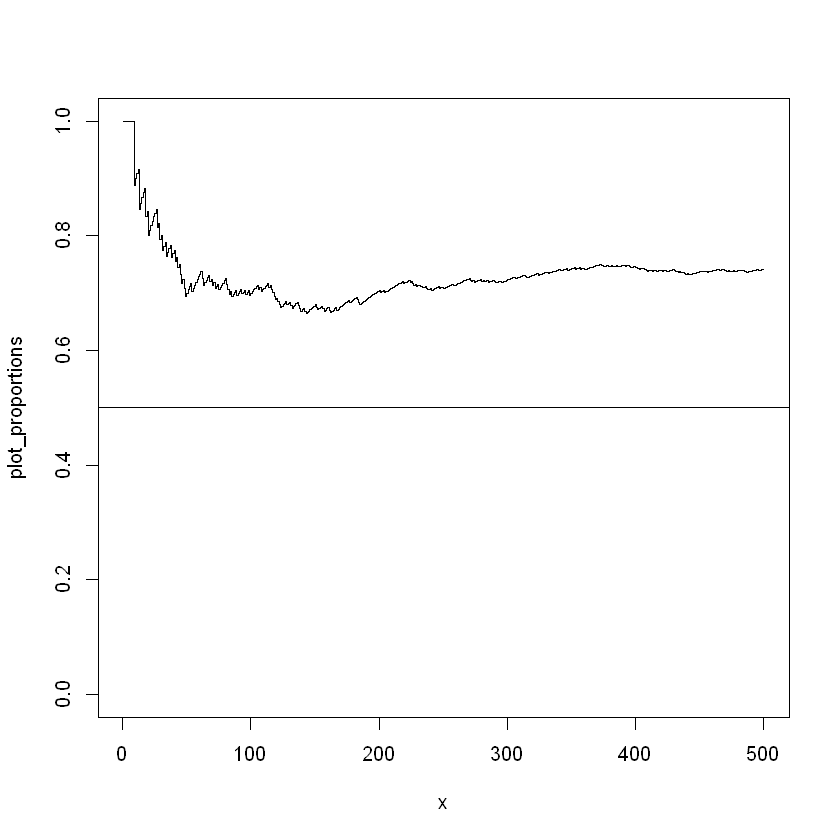

In [55]:
flips = sample(coin, size=500, prob = c(0.75,0.25), replace=TRUE)
head(flips)
tail(flips)

cumulative_heads = 0
plot_proportions = c()

for (i in 1:length(flips)){
    heads = flips[i] == "H"
    cumulative_heads = cumulative_heads + heads
    proportion_heads = cumulative_heads/i
    plot_proportions = c(plot_proportions,proportion_heads)
    }
x = seq(1,length(flips))
plot(x,plot_proportions,type = "s",ylim=c(0,1))
abline(0.5,0)


## Problem 2

Suppose that your music app contains $100$ songs, $10$ of which are by the group BLACKPINK. Using the shuffle feature, what is the probability that the first BLACKPINK song heard is the fifth song played?

Let's run a simulation to estimate the probability.

1. Create a variable to represent the $100$ songs in your library, where $10$ are BLACKPINK songs (denoted with a `1`) and $90$ are non-BLACKPINK songs (denoted with a `0`). The result should be a vector named `songs` of length $100$, with $10$ `1`s and $90$ `0`s. Using `rep()` will make life easier!

2. Randomly draw five songs, *without replacement*, from `songs` with the `sample()` function. What does the result look like?

3. Write code to test whether the five-song draw from step 2 meets the description "the first BLACKPINK song heard is the fifth song played". 

4. Repeat step 2 `m = 10,000` times.

5. Repeat step 3 for each of the `m` five song draws created in step 4.

6. Estimate the probability that "the first BLACKPINK song heard is the fifth song played". What could make your answer more accurate? Less accurate?


In [46]:
#1 
songs = 100
blackpink = 10
non_blackpink = 90

songs = c(rep(1,blackpink),rep(0,non_blackpink))
head(songs)
tail(songs)

[1] 1 1 1 1 1 1

[1] 0 0 0 0 0 0

In [47]:
#2
five_random_songs = sample(songs,size=5,replace=FALSE)
five_random_songs

[1] 0 0 0 0 0

In [48]:
#3
condition = all(five_random_songs[1:4]==0) && five_random_songs[5] == 1
condition

[1] FALSE

In [49]:
#4
set.seed(99)
m = 10000
resultant_vec = rep(NA,m)

Here
The 'FALSE' represents if the set of vector is not in the form ' 0 0 0 0 1'
The 'TRUE'  represents if the set of vector is in the form ' 0 0 0 0 1'  

In [50]:
#5
for (i in 1:m) {
  five_random_songs = sample(songs, 5, replace = FALSE)
  resultant_vec[i] = all(five_random_songs[1:4] == 0) && five_random_songs[5] == 1
}
head(resultant_vec)

[1] FALSE FALSE FALSE  TRUE FALSE FALSE

In [51]:
#6
prob = mean(resultant_vec)
prob

[1] 0.0697

The probability here decreases when the number of iterations increases, and the accuracy of the expected outcome '0 0 0 0 1' will increase if we increase the iterations so that we will get more vectors that will have four consecutive Non-Black Pink songs and the fifth Black Pink Song.

# Problem 3

Imagine two unmarked bags filled with poker chips. Each bag contains both red poker chips and white poker chips. In bag one, there are $75\%$ red and $25\%$ white; in bag two, there are $75\%$ white and $25\%$ red. Imagine that you pick one bag at random, and, without looking inside, begin to pull chips out, one at a time. 

**3.(a) Before you start picking out chips, what is the probability that you choose bag one?**

$$P('One') = \frac{1}{2}$$

**3.(b) What is the probability that you chose bag one given that you draw a red chip?**

$$P('One' |  R) = \frac{P(R | 'One')P('One')}{P(R | 'One')P('One') + P(R | 'Two')P('Two')}$$

$$\textbf{The values are}$$

$$P(R|'One') = 75\% = 0.75$$

$$P('One') = 50\% = 0.50$$

$$P(R|'Two') = 25\% = 0.25$$

$$P('Two') = 50\% = 0.5$$

$$\textbf{On substituting,}$$

$$P('One'|R) = \frac{0.75 * 0.50}{(0.75 * 0.5) + (0.25 * 0.5)}$$

$$P('One'|R) = 0.75 = 75\%$$

**3.(c) What is the probability that you have bag one given that your first two draws are red chips? What about three? Is there a pattern?**

*Hint:* to investigate whether there is a pattern, it may be useful to look at the *odds*, which is given by the fraction $\displaystyle{\frac{p}{1 - p}}$, for the probability $p$ of the events you calculate in 3(b) and 3(c).

$$\text{Probability of Bag 1, with first two draws are Red}$$

$$P('One'|RR) = \frac{P(RR|'One')P('One')}{P(RR|'One')P('One') + P(RR|'Two')P('Two')}$$

$$\text{Where, } P(RR|'One') = 0.5625, P('One') = 0.5, P(RR|'Two') = 0.0625, P('Two') = 0.5$$

$$\text{On substituting,}$$

$$P('One'|RR) = \frac{0.5625 * 0.5}{(0.5625 * 0.5) + (0.0625 * 0.5)}$$

$$P('One'|RR) = 0.9 = 90\%$$

$$\text{Probability of Bag 1, with first three draws are Red}$$

$$P('One'|RRR) = \frac{P(RRR|'One')P('One')}{P(RRR|'One')P('One') + P(RRR|'Two')P('Two')}$$

$$\text{Where, } P(RRR|'One') = (0.15)^3 = 0.421875, P(RRR|'Two') = (0.15)^3 = 0.015625$$

$$\text{On substituting,}$$

$$P('One'|RRR) = \frac{0.421875 * 0.5}{(0.421875 * 0.5) + (0.015625 * 0.5)}$$

$$P('One'|RRR) = 0.97 = 97\%$$


The pattern here is the probability of 'Bag one' given the number of reds taken from it increases if we increase getting no. of red chips. When 1 red chip taken from bag 1 it's probility is 75%, 2 red chips taken from it it's probability is 90% and for three red chips the probability again increases to 97%.